In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

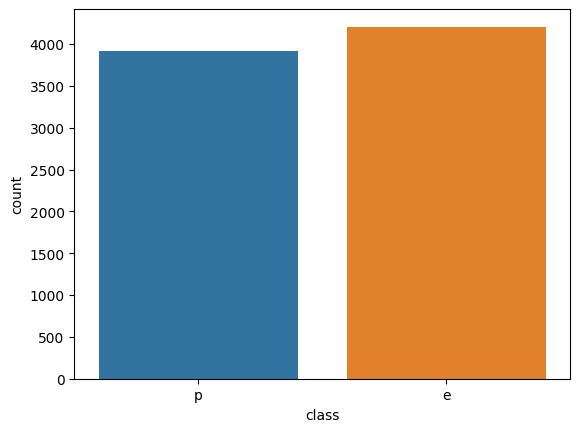

In [25]:
sns.countplot(data=df, x='class', hue='class')

In [29]:
feat_uni = df.describe().T.reset_index().sort_values('unique')

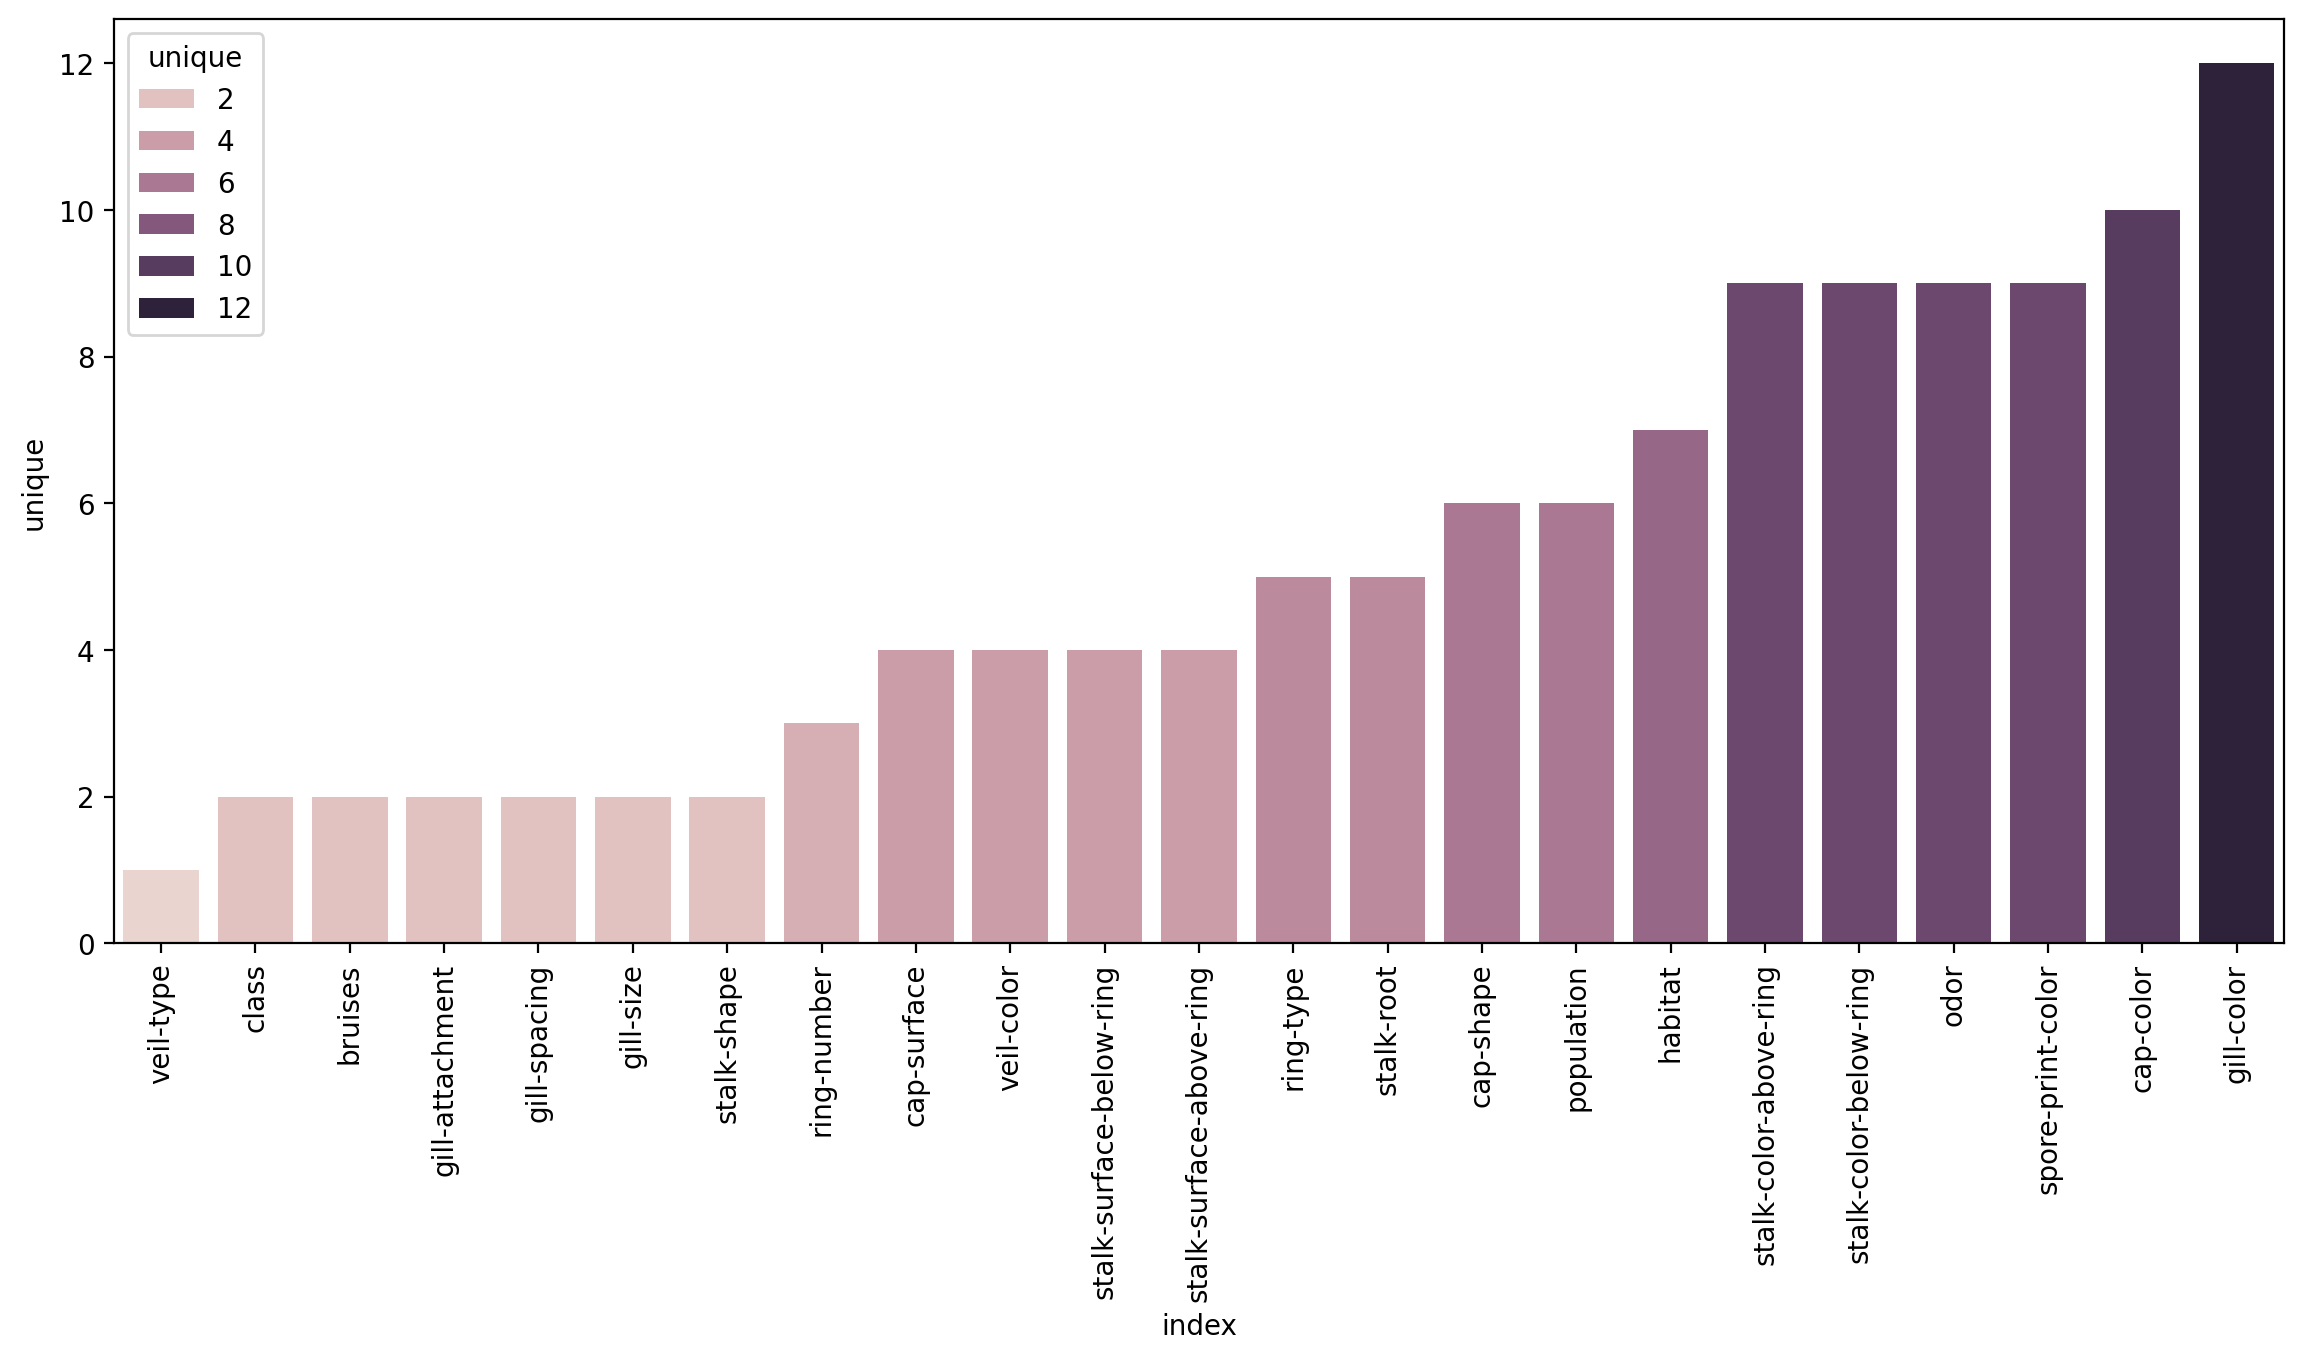

In [38]:
plt.figure(figsize=(14,6) ,dpi=200)
sns.barplot(data=feat_uni,x='index',y='unique', hue='unique')
plt.xticks(rotation=90);

In [20]:
X = df.drop('class', axis=1)

In [41]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [47]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
y = df['class']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
adaboost = AdaBoostClassifier(n_estimators=1)
#adaboost is an ensemble method that adaptively combines many weak learners into a strong one

In [54]:
adaboost.fit(X_train, y_train)

,estimator,None
,n_estimators,1
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [58]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [59]:
y_pred = adaboost.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



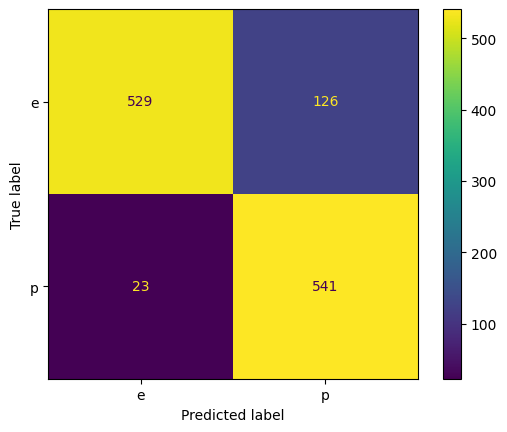

In [60]:
ConfusionMatrixDisplay.from_estimator(adaboost, X_test, y_test)

In [62]:
adaboost.feature_importances_
#as the model's n_estimators parameter is equal to 1, the single number of features in 
#feature_importances_ has a weight of 1

# the feature importances are the same as the weights

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [63]:
adaboost.feature_importances_.argmax()

np.int64(22)

In [66]:
X.columns[22]
#odor_n is the most important feature 
#odor_n stands for the odor of the mushroom. n stands for none

#Therefore, you initially need to check if mushrooms have an odor

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

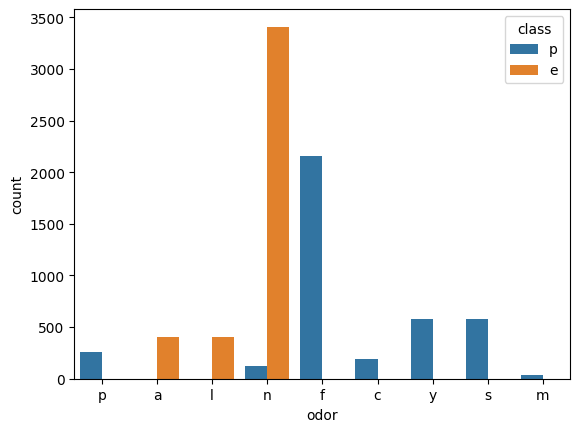

In [ ]:
sns.countplot(data=df, x='odor', hue='class')
#for odor==n, most of the mushrooms are e-edible

In [71]:
from sklearn.metrics import accuracy_score

In [70]:
len(X.columns)

95

In [72]:
error_rates = []
for n in range(1, 96):
    adaboost_n = AdaBoostClassifier(n_estimators=n)
    adaboost_n.fit(X_train, y_train)
    
    adaboost_n_pred = adaboost_n.predict(X_test)

    error = 1 - accuracy_score(y_test, adaboost_n_pred)
    error_rates.append(error)

Text(0, 0.5, 'Error{1 - Accuracy}')

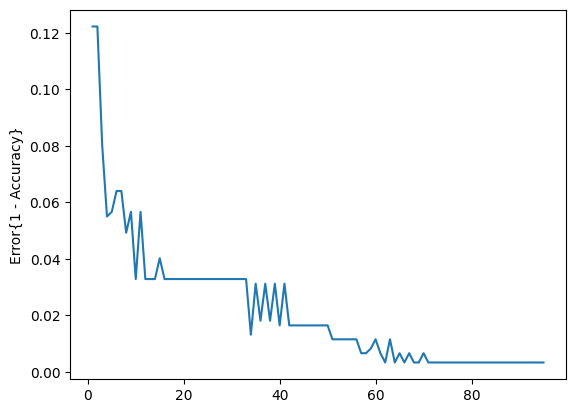

In [75]:
plt.plot(range(1,96),error_rates)
plt.ylabel('Error{1 - Accuracy}')

In [78]:
adaboost_n

,estimator,None
,n_estimators,95
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [ ]:
adaboost_n.feature_importances_

#adaboost with n_estimators=95

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     

In [82]:
features = pd.DataFrame(index=X.columns, data=adaboost_n.feature_importances_, columns=['Importance'])

In [89]:
imp_feats = features[features['Importance'] > 0]
imp_feats

,Importance
odor_c,0.087581
odor_f,0.154831
odor_l,0.032974
odor_n,0.075969
odor_p,0.085536
gill-spacing_w,0.014493
gill-size_n,0.047615
stalk-shape_t,0.022613
stalk-root_c,0.019609
stalk-surface-above-ring_k,0.041459


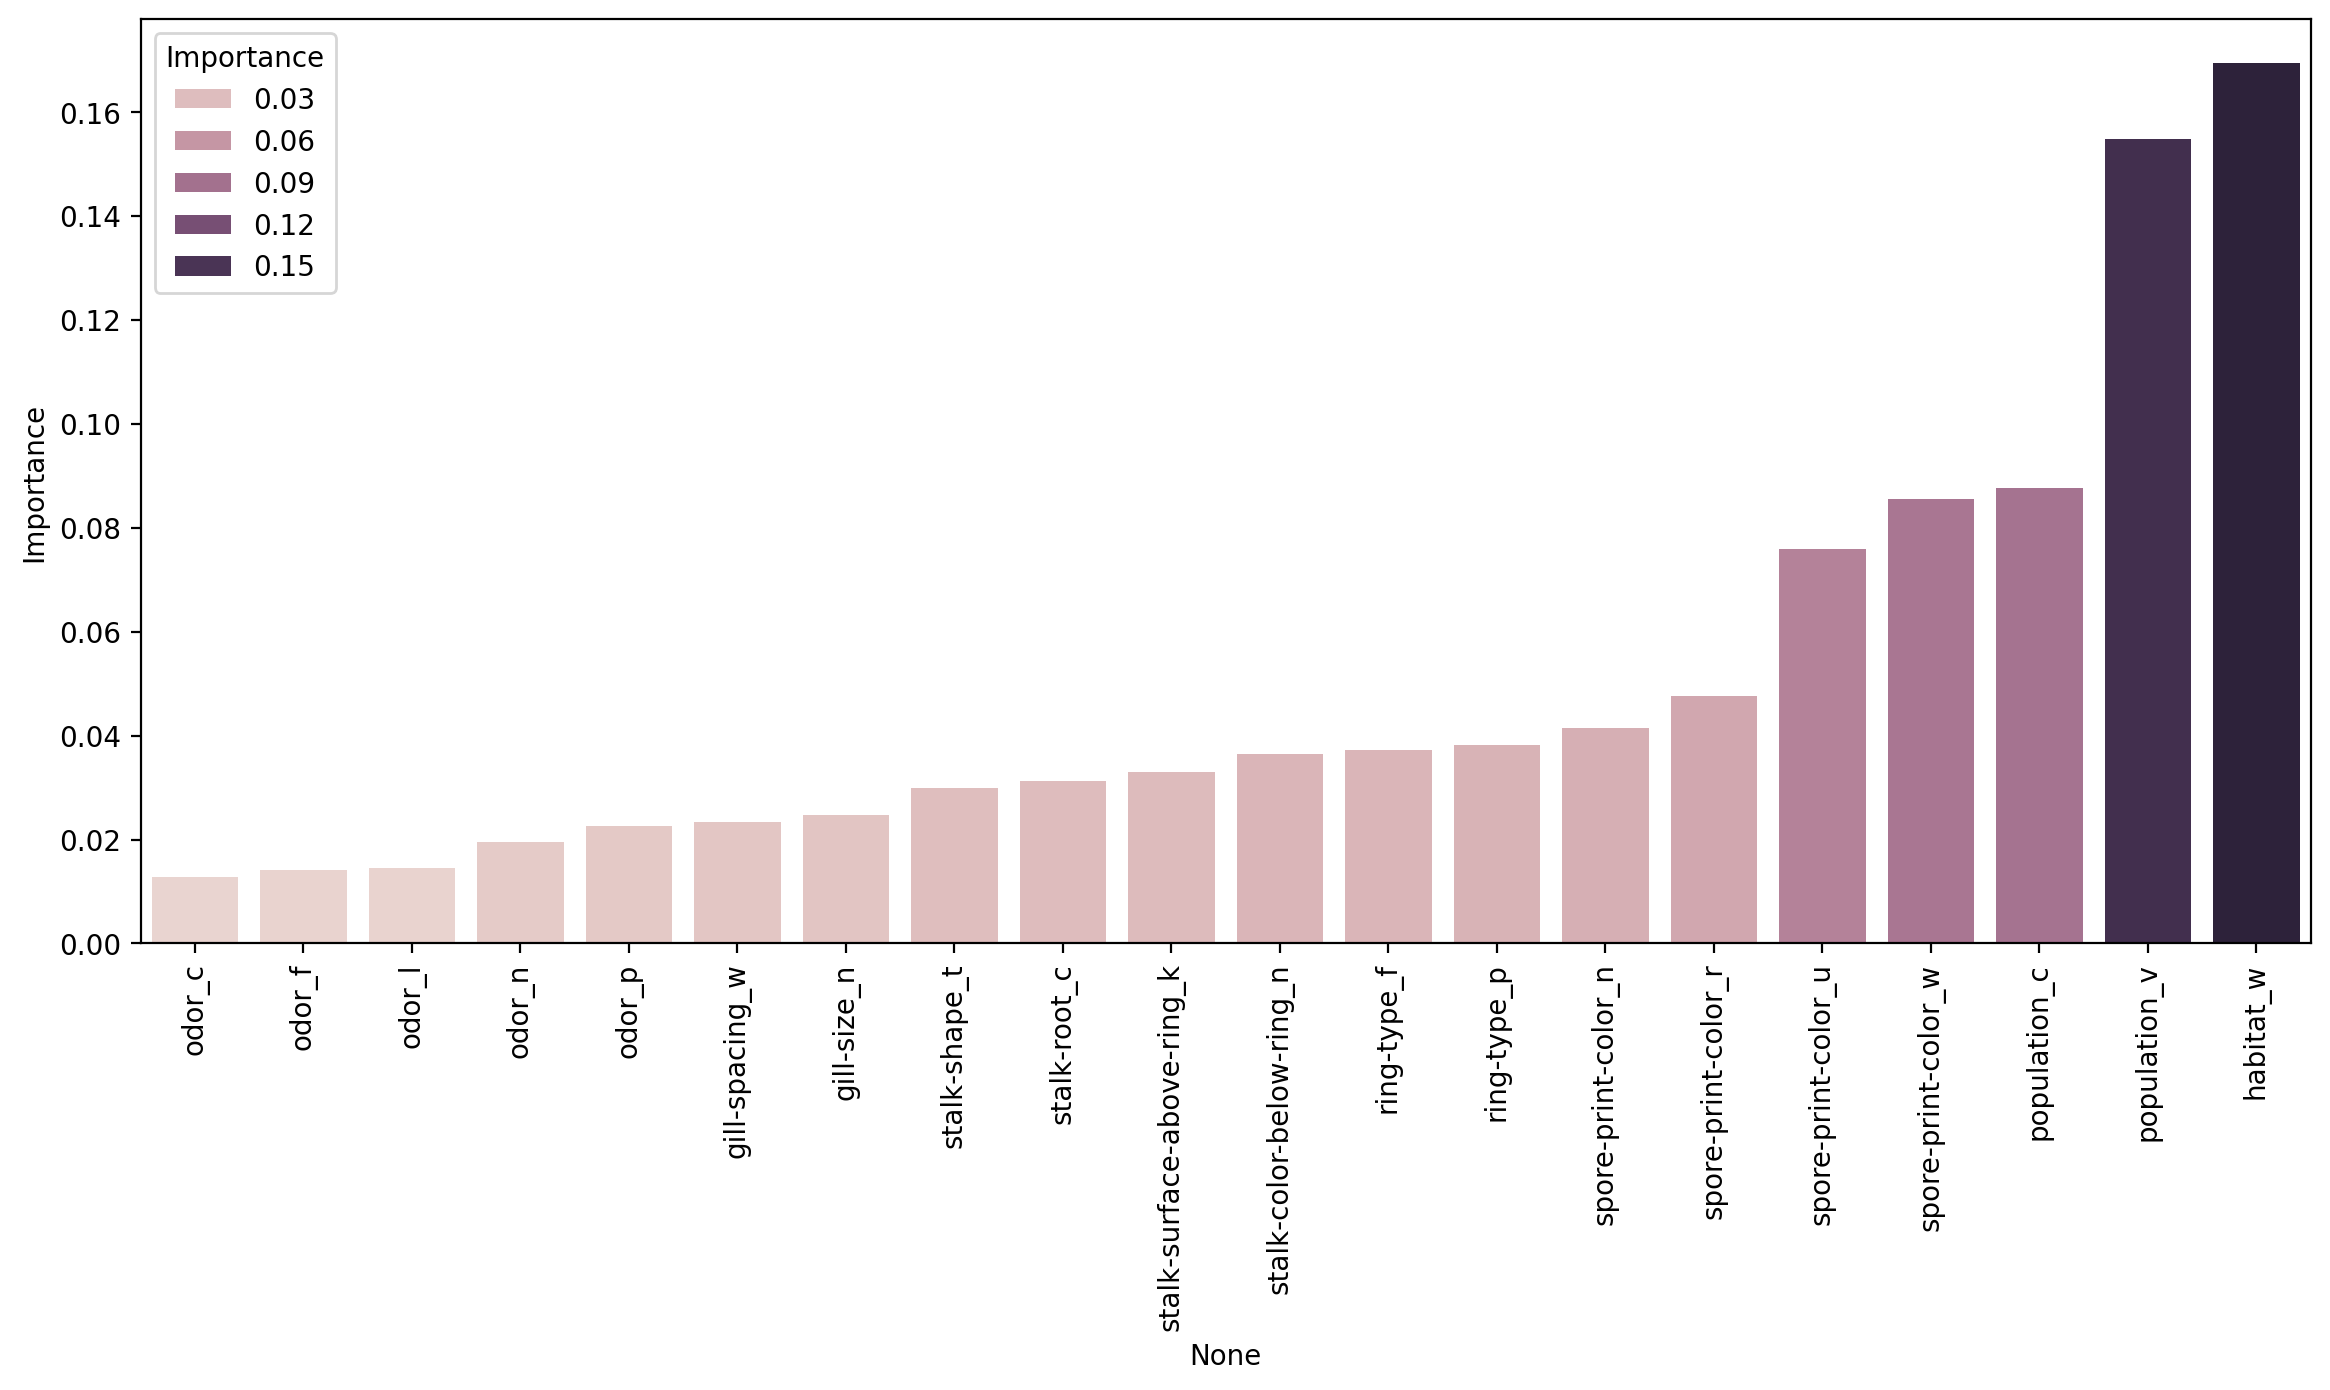

In [95]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.index, y='Importance', hue='Importance')
plt.xticks(rotation=90);

In [96]:
adaboost_25 = AdaBoostClassifier(n_estimators=25)

In [97]:
adaboost_25.fit(X_train, y_train)

,estimator,None
,n_estimators,25
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [98]:
y_pred = adaboost_25.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.97      0.97      0.97       655
           p       0.97      0.96      0.96       564

    accuracy                           0.97      1219
   macro avg       0.97      0.97      0.97      1219
weighted avg       0.97      0.97      0.97      1219



In [101]:
feats = adaboost_25.feature_importances_
feats

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01603499, 0.14724808,
       0.08405932, 0.        , 0.16236505, 0.03585682, 0.        ,
       0.        , 0.        , 0.        , 0.05082585, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05764644, 0.        , 0.04998928, 0.        , 0.        ,
       0.03048473, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [104]:
feats = pd.DataFrame(index=X.columns, data=feats, columns=['Importance'])
feats

,Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [106]:
imp_feats = feats[feats['Importance'] > 0]
imp_feats

,Importance
odor_c,0.016035
odor_f,0.147248
odor_l,0.084059
odor_n,0.162365
odor_p,0.035857
gill-size_n,0.050826
stalk-shape_t,0.057646
stalk-root_c,0.049989
stalk-surface-above-ring_k,0.030485
ring-type_p,0.093151


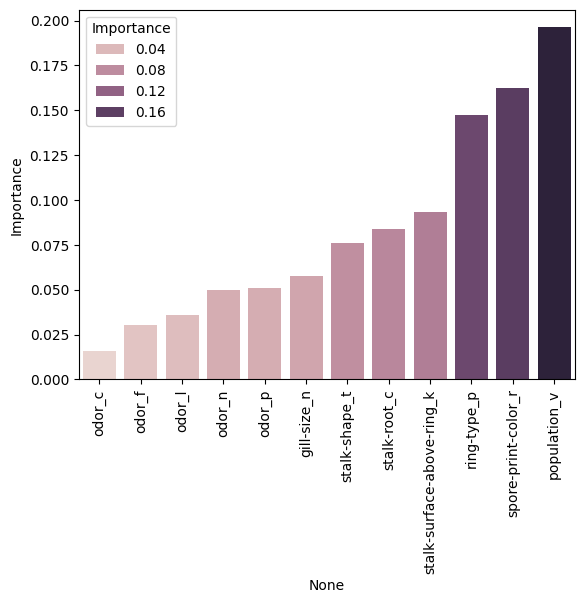

In [108]:
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.index, y='Importance', hue='Importance')
plt.xticks(rotation=90);

In [111]:
from tqdm import tqdm


error_rates = []
for n in tqdm(range(1, 96), desc='how long does it take?'):
    adaboost_n = AdaBoostClassifier(n_estimators=n)
    adaboost_n.fit(X_train, y_train)
    
    adaboost_n_pred = adaboost_n.predict(X_test)

    error = 1 - accuracy_score(y_test, adaboost_n_pred)
    error_rates.append(error)

how long does it take?: 100%|██████████| 95/95 [00:34<00:00,  2.77it/s]
